# Aula 04
* Revisão do pacote os 
* Datetime index
* Unir dataframes
* Estatística univariada
* Estatística bivariada


RJ0069RA002.csv
SP0063RA002.csv
SP0260RA002.csv
SP0269RA002.csv
SP0288RA002.csv


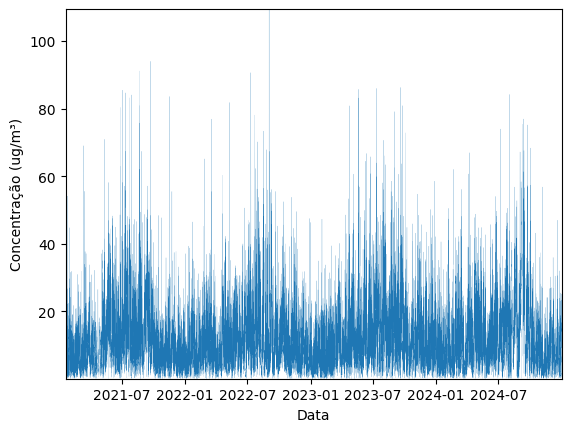

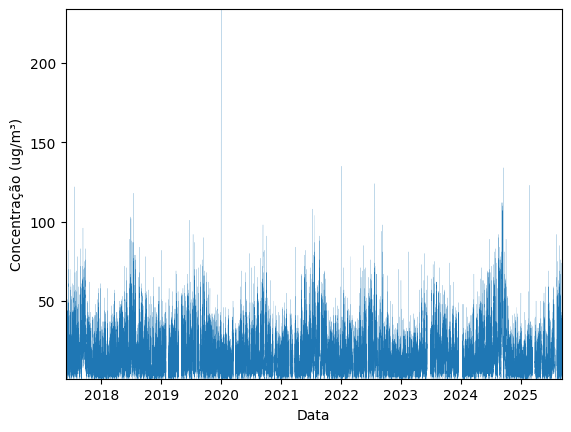

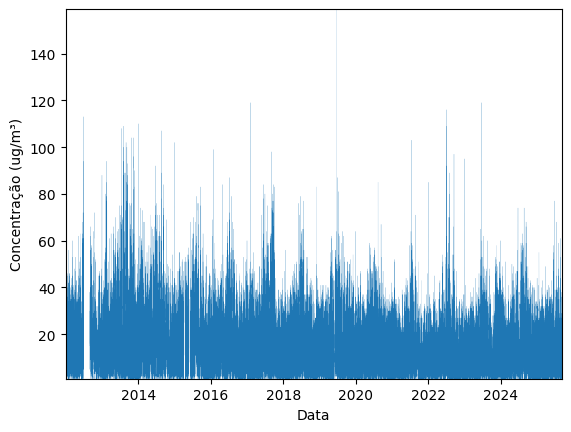

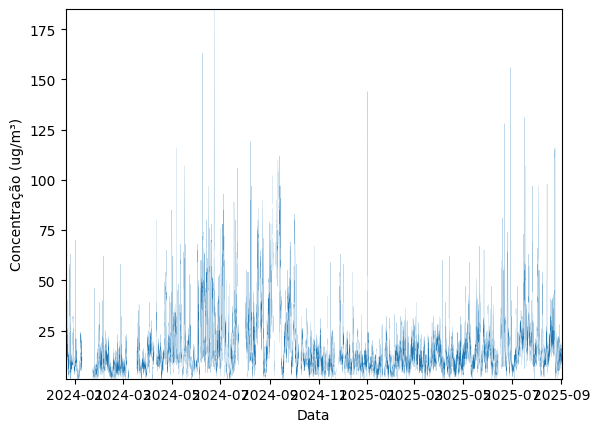

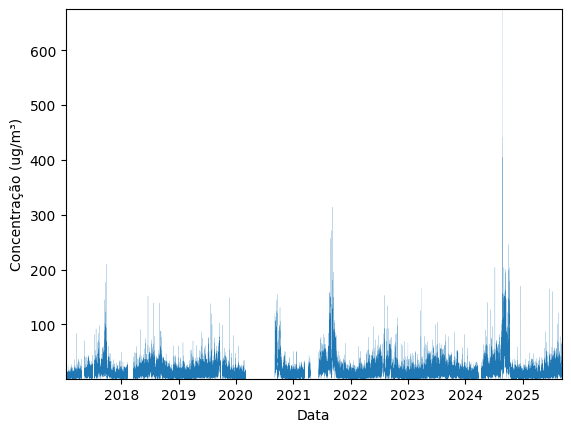

In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Listando os arquivos dentro da pasta de dados
files = os.listdir(r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\dados")
files = [ fname for fname in files if fname.endswith('.csv')]
files

# Loop em cada arquivo csv
for file in files:
    print(file)

    # Abre o arquivo 
    df = pd.read_csv(r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\dados"+'/'+file)
    
    # Formata a coluna DATETIME
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])
    
    # Criando uma figura
    fig, ax = plt.subplots()
    ax.plot(df.DATETIME, df.VALOR, linewidth = 0.1)
    ax.set_xlim([df.DATETIME.min(), df.DATETIME.max()])
    ax.set_ylim([df.VALOR.min(), df.VALOR.max()])
    ax.set_ylabel('Concentração (ug/m³)')
    ax.set_xlabel('Data')
    fig.savefig(r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\outputs"+'/'+file.split('.')[0]+'.png')

In [80]:
df.head()

,DATETIME,ANO,MES,DIA,HORA,VALOR,VALOR_ORIGINAL,UNIDADE,QAQC_INTERNO,QAQC_MMA
0,2017-01-11 15:00:00,2017,1,11,15,10.0,10.0,µg/m3,True,True
1,2017-01-11 16:00:00,2017,1,11,16,NaN,NaN,NaN,True,False
2,2017-01-11 17:00:00,2017,1,11,17,13.0,13.0,µg/m3,True,True
3,2017-01-11 18:00:00,2017,1,11,18,2.0,2.0,µg/m3,True,True
4,2017-01-11 19:00:00,2017,1,11,19,8.0,8.0,µg/m3,True,True


In [81]:
# Criando um único dataframe com várias colunas de dados
# https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html


# Loop em cada arquivo csv
df_list=[]
for ii, file in enumerate(files):
    print(file)
    print(ii)
    # Abre o arquivo 
    df = pd.read_csv(r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\dados"+'/'+file)
    
    # Formata a coluna DATETIME
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])
    df = df.set_index(df['DATETIME'])
    df = df[['VALOR']]
    df.rename(columns={'VALOR': file.split('.')[0]}, inplace=True)
    df_list.append(df)

df = pd.concat(df_list,axis=1)


df.head()

RJ0069RA002.csv
0
SP0063RA002.csv
1
SP0260RA002.csv
2
SP0269RA002.csv
3
SP0288RA002.csv
4


,RJ0069RA002,SP0063RA002,SP0260RA002,SP0269RA002,SP0288RA002
DATETIME,,,,,
2012-01-01 01:00:00,NaN,NaN,21.0,NaN,NaN
2012-01-01 02:00:00,NaN,NaN,56.0,NaN,NaN
2012-01-01 03:00:00,NaN,NaN,38.0,NaN,NaN
2012-01-01 04:00:00,NaN,NaN,40.0,NaN,NaN
2012-01-01 05:00:00,NaN,NaN,21.0,NaN,NaN


C:\Users\Leonardo.Hoinaski\AppData\Local\Temp\ipykernel_73836\186471089.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


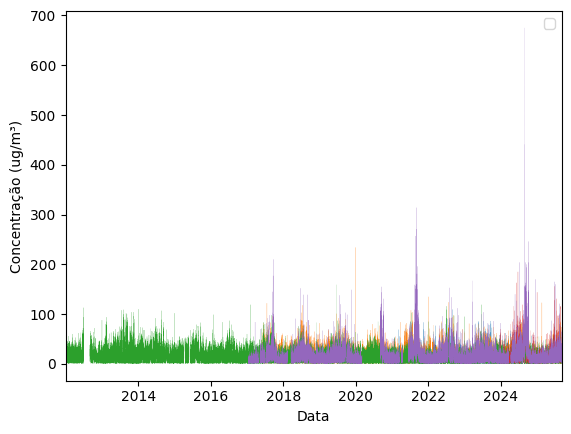

In [82]:
# Plotando as séries que armazenamos 
# Criando uma figura
fig, ax = plt.subplots()
ax.plot(df.index, df.iloc[:,0:], linewidth = 0.1)
ax.set_xlim([df.index.min(), df.index.max()])
#ax.set_ylim([df.iloc[:,3:].min(), df.iloc[:,3:].max()])
ax.set_ylabel('Concentração (ug/m³)')
ax.set_xlabel('Data')
ax.legend()
fig.savefig(r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\outputs"+'/'+file.split('.')[0]+'.png')

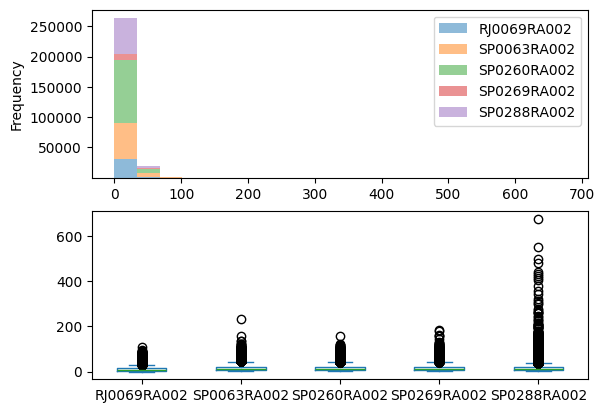

In [83]:
# Histograma e  boxplot

fig, ax = plt.subplots(2)
df.plot.hist(stacked=True, bins=20,alpha=0.5, ax=ax[0]);
df.plot.box(ax=ax[1]);

In [84]:
# Salvando csv
df.to_csv(r"C:\Users\Leonardo.Hoinaski\Documents\python_env_app\outputs"+'/'+'df.csv')

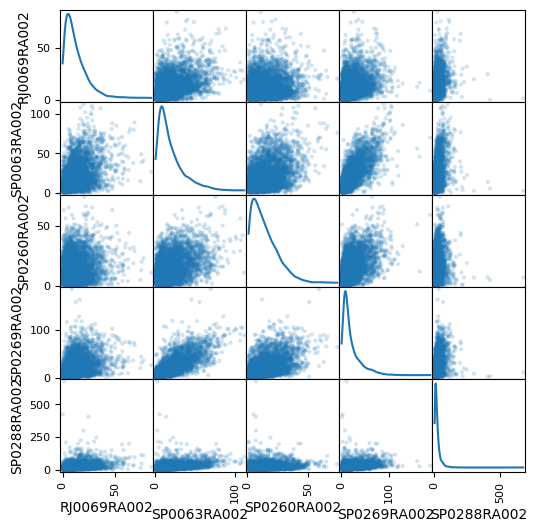

In [85]:
# Scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df.dropna(), alpha=0.2, figsize=(6, 6), diagonal="kde");

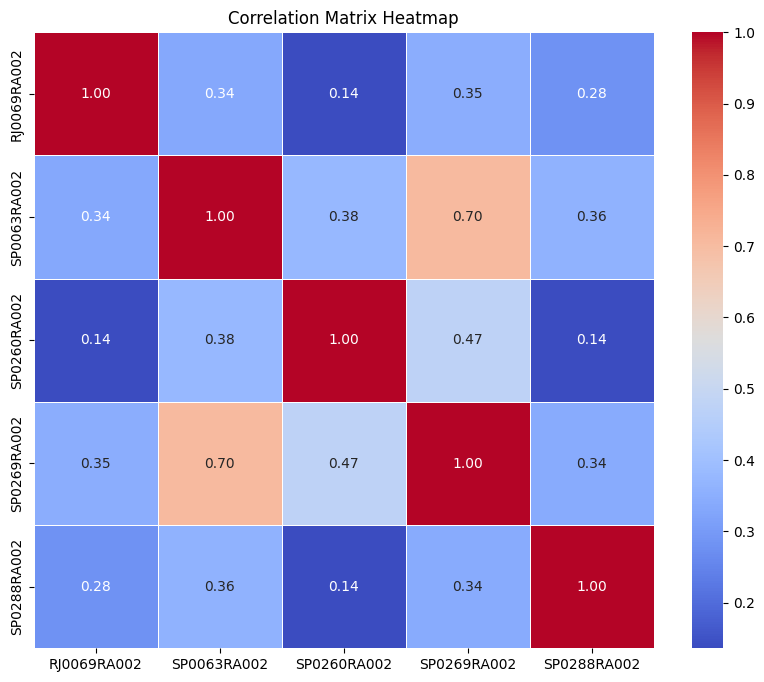

In [90]:
# Correlation matrix
import seaborn as sns

correlation_matrix = df.corr()
#correlation_matrix
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()